## Estadística  Ejercicios

In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

import random
import pickle as pkl

In [16]:
# Versiones
print (f"pandas == {np.__version__}")
print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"scipy=={scipy.__version__}")

pandas == 2.2.0
numpy==2.2.0
matplotlib==3.10.0
scipy==1.14.1


In [17]:
with open("../Data/FUELCONSUMPTION_CITY.pkl", "br") as f:
    fuel_city = pkl.load(f)
    
with open("../Data/FUELCONSUMPTION_HWY.pkl", "br") as f:
    fuel_hwy = pkl.load(f)

In [18]:
fuel_city # Gasto de combustible en la ciudad

array([ 9.9, 11.2,  6. , ..., 13.4, 12.9, 14.9], shape=(1067,))

In [19]:
fuel_hwy # Gasto de combustible en la autovía

array([ 6.7,  7.7,  5.8, ...,  9.8,  9.3, 10.2], shape=(1067,))

### Ejercicio 01:
- Define una función que tome como entrada un array y retorne la varianza. Apóyate en la siguiente fórmula:
$$ \mathbf{S^2} = \frac{1}{n} \sum_{i=1}^{n} (x_{i}^{2}- \overline{x}^2)$$

- Comprueba que funciona correctamente comparándola con _**np.var()**_.

### Ejercicio 02:
- Define una función que tome como entrada un array y retorne la desviación estándar. Apóyate en la siguiente fórmula:

$$ \mathbf{S} = \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} x_{i}^{2}- \overline{x}^2}$$

- Comprueba que funciona correctamente comprobándola con _**np.std()**_.

### Ejercicio 03:
- Define una función que tome como parámetro un array y retorne los siguientes estadísticos en forma de diccionario:
    - Mínimo
    - Máximo
    - Media
    - Cuartiles Q1, Q2 (mediana) y Q3
    - Rango intercuartil
    - Desviación estándar
- Prueba la función con los arrays **fuel_city** y **fuel_hwy**.

In [ ]:
def calcular_estadisticas(array):
    # crear diccionario
    # estadisticas = dict()
    
    # calcular estadisticas
    # min = np.min(array)
    # max = np.max(array)
    # ....
    
    # agregar estadísticas al diccionario
    # estadisticas['min'] = min
    
    # retornar el diccionario creado
    # return estadisticas
    pass

In [26]:
with open("../Data/CO2EMISSIONS.pkl", "br") as f:
    co2 = pkl.load(f)
    print (co2)

[196. 221. 136. ... 271. 260. 294.]


In [28]:
print(co2.dtype)

float64


In [35]:
co2 = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols= (8), delimiter= ",", skip_header= 1, dtype= np.float32)

In [37]:
print (co2.dtype)
print (co2.shape)

float32
(1067,)


In [102]:
def calcular_estadisticas (co2):
    diccionario= {"Co2_mean": np.mean(co2),
"Co2_median": np.median(co2),
"Co2_max": np.max (co2),
"Co2_min": np.min(co2),
"Co2_Q1": np.quantile(a = co2, q = 0.25, method=  "lower"),
"Co2_Q3": np.quantile(a = co2, q = 0.75, method = "lower"),
"Co2_vz": np.var(co2),
"Co2_dev_es": np.std(co2)}


    return diccionario
estadisticas= calcular_estadisticas(co2);
for clave, valor in estadisticas.items():
    print (f"{clave}: {valor:.4f}");


Co2_mean: 13.2965
Co2_median: 12.6000
Co2_max: 30.2000
Co2_min: 4.6000
Co2_Q1: 10.2000
Co2_Q3: 15.5000
Co2_vz: 16.8045
Co2_dev_es: 4.0993


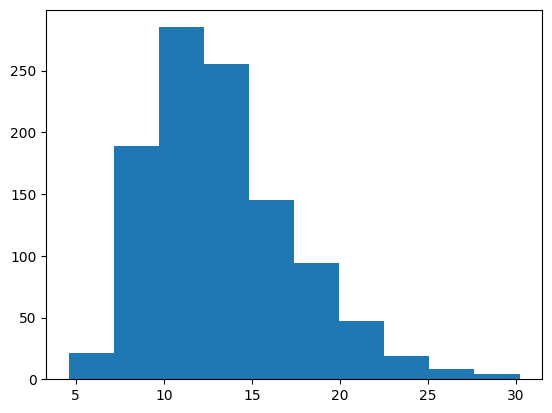

In [46]:
plt.hist (co2);

### Ejercicio 04:
- Define una función que toma un array como entrada, y retorna el mismo array sin los outliers.
- Utiliza la **Puntuación Z** para el filtrado de valores atípicos.
- Prueba la función con los arrays _**fuel_city**_ y _**fuel_hwy**_, y calcula qué porcentaje de datos se ha conservado tras el filtrado de outliers para cada caso.

In [97]:
def filtrar_outliers(fuel_city):
    z_scores= (fuel_city-np.mean(fuel_city)) /np.std(fuel_city)
    
    filtro = fuel_city [np.abs(z_scores) <= 2]
    return filtro


In [98]:
fuel_city_filtrado= filtrar_outliers (fuel_city)

In [99]:
porcentaje_fuel_city= (len(fuel_city_filtrado)/ len(fuel_city))*100

In [100]:
print (f"Fuel City. Datos: {porcentaje_fuel_city:.3f}%")

print ("\n Datos Filtrados: ")
print (f" Fuel City Filtrado: {fuel_city_filtrado}")

Fuel City. Datos: 95.220%

 Datos Filtrados: 
 Fuel City Filtrado: [ 9.9 11.2  6.  ... 13.4 12.9 14.9]


### Ejercicio 05:
- Repite el ejercicio 4 usando la **Valla de Tukey** para el filtrado de outliers.

### Ejercicio 06:
- Define una función que tome como parámetro un array y dibuje un plot. El plot debe tener:
    - La distribución de los datos del array como un histograma de color verde pastel.
    - Una línea vertical de color rojo que represente el promedio.
    - Una línea vertical de color dorado que represente la mediana.
    - Dos líneas verticales discontinuas de color gris claro que representen $-z$ y $z$.
    - Dos líneas verticales discontinuas de color gris oscuro que representen $-3z$ y $3z$.
    - Los outliers se tienen que marcar con un color naranja chillón.
    
- Aprovecha las funciones del ejercicio 1 y del ejercicio 3 para obtener los estadísticos necesarios y filtrar los outliers.
- Guiate por los notebooks de teoría para cambiar el color de las gráficas y hacer las lineas verticales.

### Ejercicio 07:
- Define una función que estandarice los datos de un array usando la siguiente fórmula:

$$
z = \frac{x_{i} - \overline{x}}{\sigma_{x}} = \frac{x_{i} - mean(x)}{std(x)}
$$

- Prueba estandarizar un array y hacer un plot usando la función del ejercicio anterior. ¿Qué diferencias ves?

### Ejercicio 08:
- Aplica una transformación de logaritmo neperiano (_**np.log**_) a los datos de **fuel_city** y **fuel_hwy** y vuelve a probar a usar la función del ejercicio 6.
- ¿Cómo son ahora las distribuciones?
- ¿Qué ocurre con los outliers?

### Ejercicio 09:
- Defina una función que calcule la correlación entre dos arrays. Apoyate en las siguientes fórmulas:

$$
\Large Cov(X, Y) = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{n}\\
$$

<br>

$$
\Large \rho = \frac{Cov(X, Y)}{\sigma_{x}\sigma_{y}}
$$

- Usa la función para calcular la correlación entre **fuel_city** y **fuel_hwy**.
- Comprueba que funciona correctamente contrastando con el resultado de la función _**stats.pearsonr()**_.

### Ejercicio 10:
- Elige un array y toma 50 elementos aleatorios. Calcula las estadísticas para ese nuevo conjunto de datos.
- ¿Son similares estos resultados a los obtenidos de la población total?

### Ejercicio 11:
- Repite el ejercicio anterior, esta vez creando 5 conjuntos de 50 elementos aleatorios.
    - Calcula las estadísticas para cada conjunto de 50 elementos, guarda estos datos.
    - Calcula las estadísticas de los resultados anteriores.
    - ¿Son similares estos datos con los obtenidos de la población total?
    - Prueba hacerlo creando 100 conjuntos de 50 elementos esta vez.

### Ejercicio 12:
- Realiza un contraste de hipótesis y comprueba si se gasta más combustible en la ciudad que en la autovía.
    - **fuel_city**: gasto en ciudad
    - **fuel_hwy**: gasto en autovía
    - $H_0$: el gasto de combustible en la ciudad es igual o menor al gasto en la autovía.
    - $H_1$: el gasto de combustible en la ciudad es mayor al gasto en la autovía.
    
_**Pista**: hay que aplicar una prueba **t de Student** para **muestras pareadas** `stats.ttest_rel()`, o una prueba **Wilcoxon** para **muestras pareadas** `stats.wilcoxon()`, dependiendo de si se cumplen los supuestos de normalidad y homogeneidad de varianzas. Pueden especificar el parámetro `alternative` con el argumento `"greater"` para un contraste de tipo `a>b`._

In [101]:
##############################################################################################################################